# Exploration of Alexa Reviews using NLP

Pooja Umathe

In this project I am going to predict user given ratings of Alexa using natural lanuage processing techniques. The data consists of the following fields: rating, date, variation, and review text from amazon

In [1]:
# Importing library and dataset
import pandas as pd
df = pd.read_table('amazon_alexa.tsv')


C:\Users\pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


## Data Preprocessing

In [2]:
# Showing first 5 columns of the data 
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
# Getting info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [4]:
# Describing the data and getting mean, max, min, std, count
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
# Showing clumns of the data 
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [6]:
# As we can see that our one column is containing categorical values
# we are using one hot encoder which will encoding for the model to understand this variable

df1 = df[['variation']]
df2 = df.drop(['variation'], axis = 1)
df1 = pd.get_dummies(df1)
df = pd.concat([df1,df2], axis = 1)
df.head()

,variation_Black,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot,rating,date,verified_reviews,feedback
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,31-Jul-18,Love my Echo!,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,31-Jul-18,Loved it!,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,31-Jul-18,"Sometimes while playing a game, you can answer...",1
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,31-Jul-18,I have had a lot of fun with this thing. My 4 ...,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,31-Jul-18,Music,1


In [7]:
# We have date column in our dataset which needs to be addressed and the model which will accept only numeric inputs, 
# will not be able to interpret this information.

df['Year'] = pd.DatetimeIndex(df['date']).year
df['Month'] = pd.DatetimeIndex(df['date']).month
df['Day'] = pd.DatetimeIndex(df['date']).day
df = df.drop(['date'], axis = 1)
df.head()

,variation_Black,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,...,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot,rating,verified_reviews,feedback,Year,Month,Day
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,5,Love my Echo!,1,2018,7,31
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,5,Loved it!,1,2018,7,31
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,"Sometimes while playing a game, you can answer...",1,2018,7,31
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,5,I have had a lot of fun with this thing. My 4 ...,1,2018,7,31
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,5,Music,1,2018,7,31


Now, we are going to use TextBlob. It will analyze text strings and provide numeric outputs relating to sentiment.
TextBlob will output both the polarity (range -1 to 1) as well as subjectivity (range 0 to 1) in the form of a tuple. 
The results of this process can be mapped into columns containing polarity and subjectivity respectively.

In [8]:
from textblob import TextBlob

In [9]:
# Defining the function which will output sentiment given a string input and that
# will return a neutral output if the input cannot be handled.

def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return TextBlob('hello').sentiment

In [10]:
# Creating new column sentiment

df['sentiment'] = df['verified_reviews'].apply(lambda text: sentiment_calc(text))
df[['polarity', 'subjectivity']] = df['sentiment'].apply(pd.Series)
df = df.drop(['sentiment'], axis = 1)
df.head()

,variation_Black,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,...,variation_White Show,variation_White Spot,rating,verified_reviews,feedback,Year,Month,Day,polarity,subjectivity
0,0,0,0,0,0,1,0,0,0,0,...,0,0,5,Love my Echo!,1,2018,7,31,0.625,0.6000
1,0,0,0,0,0,1,0,0,0,0,...,0,0,5,Loved it!,1,2018,7,31,0.875,0.8000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,4,"Sometimes while playing a game, you can answer...",1,2018,7,31,-0.100,0.5125
3,0,0,0,0,0,1,0,0,0,0,...,0,0,5,I have had a lot of fun with this thing. My 4 ...,1,2018,7,31,0.350,0.4500
4,0,0,0,0,0,1,0,0,0,0,...,0,0,5,Music,1,2018,7,31,0.000,0.0000


In [11]:
# To return the average word length by defining a function 

def avg_word(sentence):
  try:
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))
  except:
    return 0

In [12]:
# Based on the review text column creating new columns

df['number_words'] = df['verified_reviews'].str.split().str.len()
df['number_character'] = df['verified_reviews'].str.len()
df['avg_word'] = df['verified_reviews'].apply(lambda x: avg_word(x))

In [13]:
# creating a column that contains the number of stopwords in the review text.

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords'] = df['verified_reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,variation_Black,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,...,feedback,Year,Month,Day,polarity,subjectivity,number_words,number_character,avg_word,stopwords
0,0,0,0,0,0,1,0,0,0,0,...,1,2018,7,31,0.625,0.6000,3,13,3.666667,1
1,0,0,0,0,0,1,0,0,0,0,...,1,2018,7,31,0.875,0.8000,2,9,4.000000,0
2,0,0,0,0,0,0,0,0,0,0,...,1,2018,7,31,-0.100,0.5125,38,195,4.131579,19
3,0,0,0,0,0,1,0,0,0,0,...,1,2018,7,31,0.350,0.4500,34,172,4.088235,12
4,0,0,0,0,0,1,0,0,0,0,...,1,2018,7,31,0.000,0.0000,1,5,5.000000,0


In [14]:
# Using Minmaxscaler for better inetrpretation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = ['number_character','number_words', 'avg_word', 'stopwords']
for col in columns:
  df[[col]] = scaler.fit_transform(df[[col]])
df.head()

,variation_Black,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,...,feedback,Year,Month,Day,polarity,subjectivity,number_words,number_character,avg_word,stopwords
0,0,0,0,0,0,1,0,0,0,0,...,1,2018,7,31,0.625,0.6000,0.005703,0.004211,0.056410,0.004484
1,0,0,0,0,0,1,0,0,0,0,...,1,2018,7,31,0.875,0.8000,0.003802,0.002807,0.061538,0.000000
2,0,0,0,0,0,0,0,0,0,0,...,1,2018,7,31,-0.100,0.5125,0.072243,0.068070,0.063563,0.085202
3,0,0,0,0,0,1,0,0,0,0,...,1,2018,7,31,0.350,0.4500,0.064639,0.060000,0.062896,0.053812
4,0,0,0,0,0,1,0,0,0,0,...,1,2018,7,31,0.000,0.0000,0.001901,0.001404,0.076923,0.000000


In [15]:
from gensim.summarization import summarize
def sum_text(text):
  try:
    summed_text = summarize(text)
    return summed_text
  except:
    return text

In [16]:
df['summed_text'] = df['verified_reviews'].apply(lambda x: sum_text(x))
df['sentiment_sum'] = df['summed_text'].apply(lambda text: sentiment_calc(text))
df[['polarity_sum', 'subjectivity_sum']] = df['sentiment_sum'].apply(pd.Series)
df = df.drop(['sentiment_sum'], axis = 1)
df.head()

,variation_Black,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,...,Day,polarity,subjectivity,number_words,number_character,avg_word,stopwords,summed_text,polarity_sum,subjectivity_sum
0,0,0,0,0,0,1,0,0,0,0,...,31,0.625,0.6000,0.005703,0.004211,0.056410,0.004484,Love my Echo!,0.625,0.6
1,0,0,0,0,0,1,0,0,0,0,...,31,0.875,0.8000,0.003802,0.002807,0.061538,0.000000,Loved it!,0.875,0.8
2,0,0,0,0,0,0,0,0,0,0,...,31,-0.100,0.5125,0.072243,0.068070,0.063563,0.085202,,0.000,0.0
3,0,0,0,0,0,1,0,0,0,0,...,31,0.350,0.4500,0.064639,0.060000,0.062896,0.053812,,0.000,0.0
4,0,0,0,0,0,1,0,0,0,0,...,31,0.000,0.0000,0.001901,0.001404,0.076923,0.000000,Music,0.000,0.0


In [17]:
# Creating a new dataframe which can be fed into the model

df2 = df.drop(['verified_reviews', 'summed_text'], axis = 1)
df2.head()

,variation_Black,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,...,Month,Day,polarity,subjectivity,number_words,number_character,avg_word,stopwords,polarity_sum,subjectivity_sum
0,0,0,0,0,0,1,0,0,0,0,...,7,31,0.625,0.6000,0.005703,0.004211,0.056410,0.004484,0.625,0.6
1,0,0,0,0,0,1,0,0,0,0,...,7,31,0.875,0.8000,0.003802,0.002807,0.061538,0.000000,0.875,0.8
2,0,0,0,0,0,0,0,0,0,0,...,7,31,-0.100,0.5125,0.072243,0.068070,0.063563,0.085202,0.000,0.0
3,0,0,0,0,0,1,0,0,0,0,...,7,31,0.350,0.4500,0.064639,0.060000,0.062896,0.053812,0.000,0.0
4,0,0,0,0,0,1,0,0,0,0,...,7,31,0.000,0.0000,0.001901,0.001404,0.076923,0.000000,0.000,0.0


## Data Visualization

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

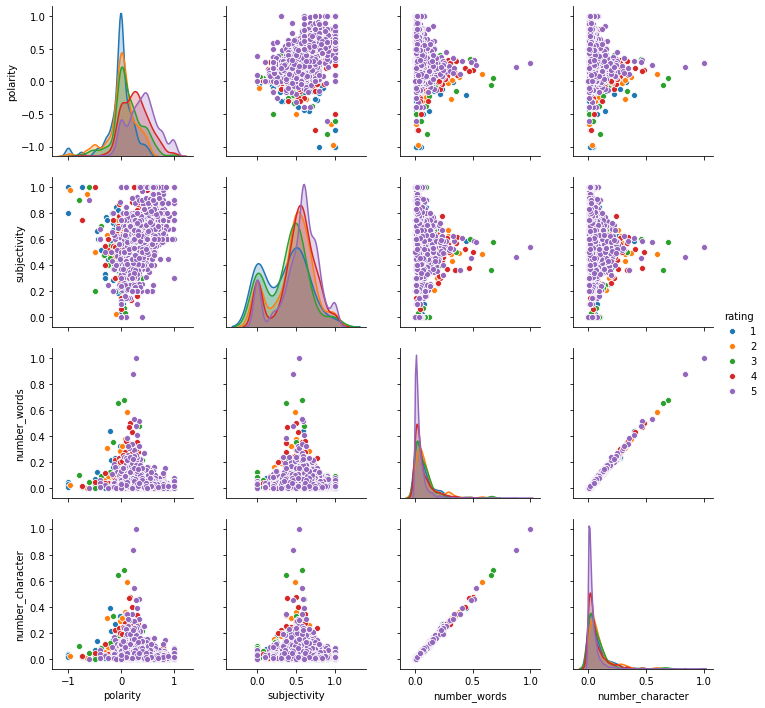

In [19]:
sns_plot = sns.pairplot(df, hue = 'rating', vars=['polarity','subjectivity', 'number_words', 'number_character'])
#sns_plot.savefig('name_of_file.png')
#files.download('name_of_file.png')

## Building and Executing the Model

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np
df1=np.matrix(df2.drop(['rating'], axis = 1))
y=np.array(df2['rating'])
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                             max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, 
                             random_state=None, verbose=0, warm_start=False, class_weight=None)

rfc.fit(X_train,y_train)

score = rfc.score(X_test,y_test)

print(score)

0.8634920634920635


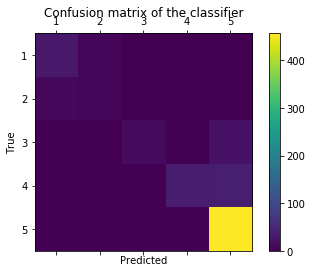

In [22]:
from sklearn.metrics import confusion_matrix
predictions = rfc.predict(X_test)
cm = confusion_matrix(y_test, predictions)
labels = ['1','2','3','4','5']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [23]:
print(cm)

[[ 31   6   0   0   0]
 [ 10   8   0   0   0]
 [  0   0  13   3  22]
 [  0   0   0  35  39]
 [  0   0   3   3 457]]


The results are pretty good. We achieved an accuracy of approximately 84%, with most of the incorrect predictions being in an adjacent square.